In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=b2e514cbc46687e7f3074542e21ad8064921e89b9db2b65e76a455970a7903fd
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from lime import lime_tabular
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
data_path = '/content/drive/MyDrive/cse445/Dhaka_PM2.5_2022_YTD.csv'
  # Replace data path
df = pd.read_csv(data_path)

In [ ]:
import pandas as pd


file1 = "/content/drive/MyDrive/cse445/Dhaka_PM2.5_2022_YTD.csv"
file2 = "/content/drive/MyDrive/cse445/Dhaka_PM2.5_2023_YTD (1).csv"


df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Concatenate DataFrames
combined_df = pd.concat([df1, df2])

# Optional: Reset index (if needed)
combined_df = combined_df.reset_index(drop=True)  # Drops the old index and assigns new sequential numbers

# Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)  # Saves without the index column

print("CSV files successfully combined!")


CSV files successfully combined!


In [ ]:
combined_df.head()

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,Date
0,Dhaka,PM2.5 - Principal,2022-01-01 01:00 AM,2022,1,1,1,130.1,190,Unhealthy,129.0,UG/M3,1 Hr,Valid,NaN
1,Dhaka,PM2.5 - Principal,2022-01-01 02:00 AM,2022,1,1,2,128.1,188,Unhealthy,126.0,UG/M3,1 Hr,Valid,NaN
2,Dhaka,PM2.5 - Principal,2022-01-01 03:00 AM,2022,1,1,3,125.1,187,Unhealthy,121.0,UG/M3,1 Hr,Valid,NaN
3,Dhaka,PM2.5 - Principal,2022-01-01 04:00 AM,2022,1,1,4,125.6,187,Unhealthy,126.0,UG/M3,1 Hr,Valid,NaN
4,Dhaka,PM2.5 - Principal,2022-01-01 05:00 AM,2022,1,1,5,124.2,186,Unhealthy,120.0,UG/M3,1 Hr,Valid,NaN


In [ ]:
combined_df.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name', 'Date'],
      dtype='object')

In [ ]:
combined_df.dtypes

Site              object
Parameter         object
Date (LT)         object
Year               int64
Month              int64
Day                int64
Hour               int64
NowCast Conc.    float64
AQI                int64
AQI Category      object
Raw Conc.        float64
Conc. Unit        object
Duration          object
QC Name           object
Date              object
dtype: object

## Dropping Site, Parameter, Conc. Unit, QC Name and Duration as they are constant feature.


In [ ]:
# Create a backup copy of the DataFrame
backup_df = combined_df.copy()

In [ ]:
# Dropping two or more columns
combined_df.drop(columns=['Site', 'Parameter', 'Conc. Unit','Duration', 'QC Name'], inplace=True)

In [ ]:
# Verify the DataFrame after dropping the column
combined_df.head()

,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Date
0,2022-01-01 01:00 AM,2022,1,1,1,130.1,190,Unhealthy,129.0,NaN
1,2022-01-01 02:00 AM,2022,1,1,2,128.1,188,Unhealthy,126.0,NaN
2,2022-01-01 03:00 AM,2022,1,1,3,125.1,187,Unhealthy,121.0,NaN
3,2022-01-01 04:00 AM,2022,1,1,4,125.6,187,Unhealthy,126.0,NaN
4,2022-01-01 05:00 AM,2022,1,1,5,124.2,186,Unhealthy,120.0,NaN


In [ ]:
combined_df.isnull().sum()

Date (LT)        8719
Year                0
Month               0
Day                 0
Hour                0
NowCast Conc.       0
AQI                 0
AQI Category       19
Raw Conc.           0
Date             8412
dtype: int64

## Dropping Date and Date (LT) features because it contains too much null values and we can get the missing information from other features.

In [ ]:
combined_df.drop(columns=['Date (LT)', 'Date'], inplace=True)

In [ ]:
combined_df.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
0,2022,1,1,1,130.1,190,Unhealthy,129.0
1,2022,1,1,2,128.1,188,Unhealthy,126.0
2,2022,1,1,3,125.1,187,Unhealthy,121.0
3,2022,1,1,4,125.6,187,Unhealthy,126.0
4,2022,1,1,5,124.2,186,Unhealthy,120.0


<ipython-input-15-e8d0c4598a4f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_aqi_2022, x='Month', y='AQI', palette='viridis')


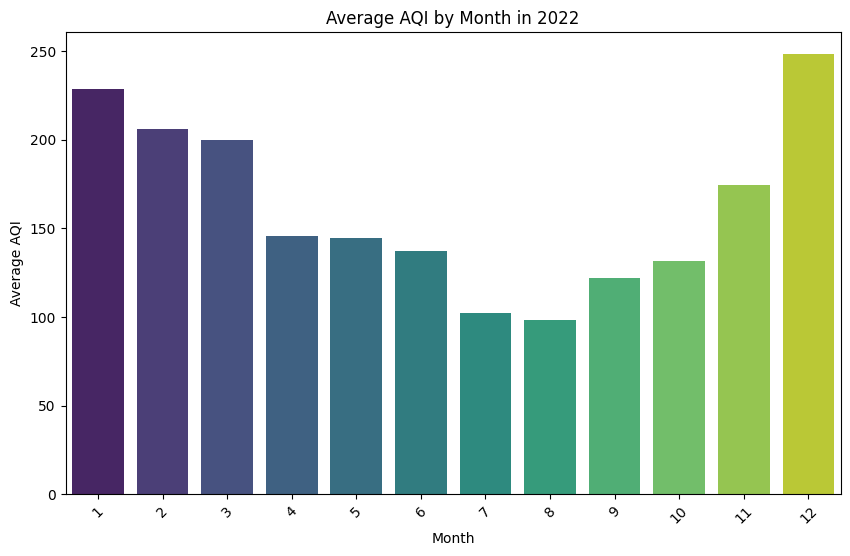

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame and it has 'Year', 'Month', and 'AQI' columns

# Filter the DataFrame for the year 2022
df_2022 = combined_df[combined_df['Year'] == 2022]

# Calculate the mean AQI for each month in 2022
monthly_aqi_2022 = df_2022.groupby('Month')['AQI'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_aqi_2022, x='Month', y='AQI', palette='viridis')

# Customize the plot
plt.title('Average AQI by Month in 2022')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)  # Rotate month labels if necessary

# Show the plot
plt.show()


<ipython-input-16-c729ee184dd1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_aqi_2023, x='Month', y='AQI', palette='viridis')


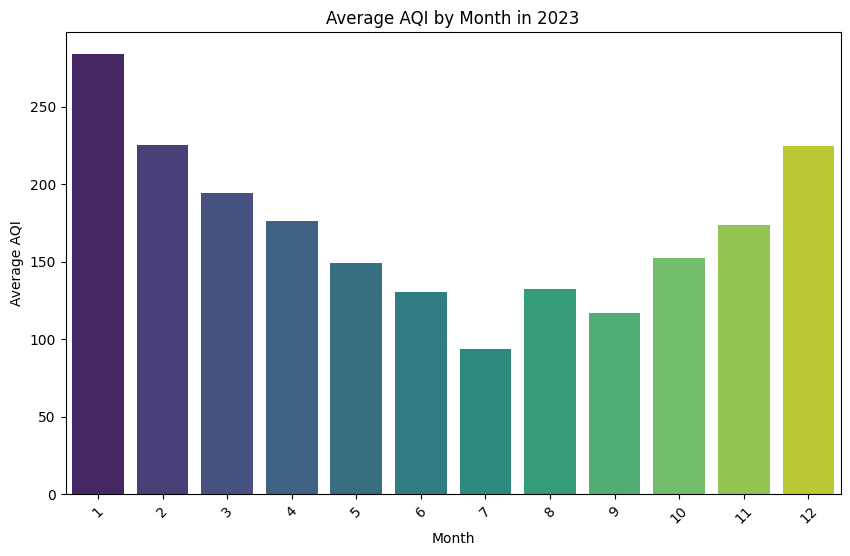

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame and it has 'Year', 'Month', and 'AQI' columns

# Filter the DataFrame for the year 2022
df_2023 = combined_df[combined_df['Year'] == 2023]

# Calculate the mean AQI for each month in 2022
monthly_aqi_2023 = df_2023.groupby('Month')['AQI'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_aqi_2023, x='Month', y='AQI', palette='viridis')

# Customize the plot
plt.title('Average AQI by Month in 2023')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(rotation=45)  # Rotate month labels if necessary

# Show the plot
plt.show()


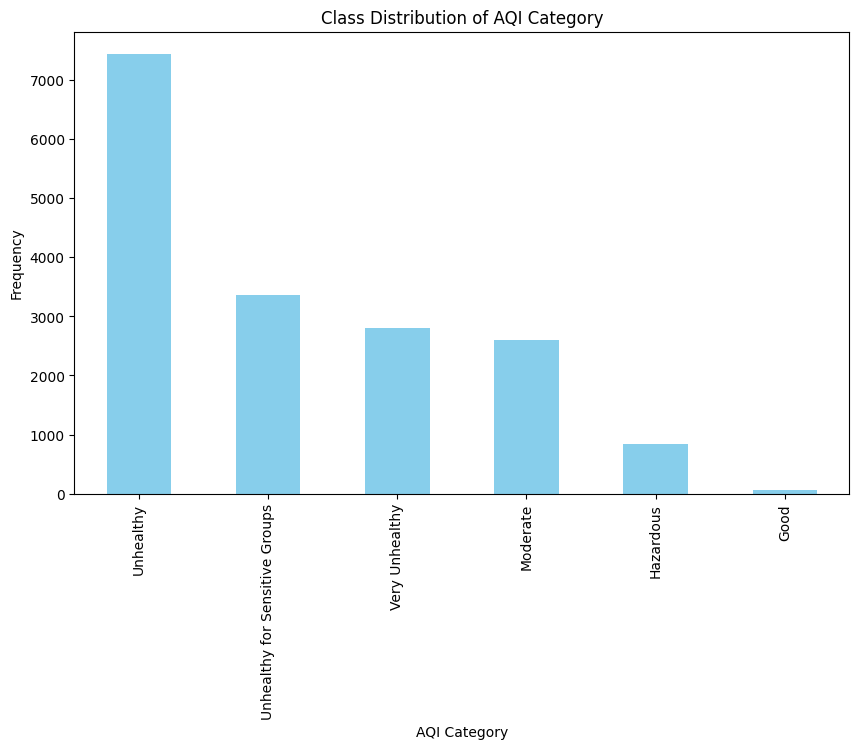

In [ ]:
class_distribution = combined_df['AQI Category'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of AQI Category')
plt.xlabel('AQI Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Label Encoding for y

In [ ]:
# Encode labels
le = LabelEncoder()
# Convert NaN to a string 'NaN' so LabelEncoder can handle it
combined_df['AQI Category'] = combined_df['AQI Category'].astype(str)
# Fit and transform the column
combined_df['AQI Category'] = le.fit_transform(combined_df['AQI Category'])

# Print the mapping of encoded values to original categories
label_mapping = {class_label: index for index, class_label in enumerate(le.classes_)}
print("Label Encoding Mapping:")
for category, index in label_mapping.items():
    print(f"{category}: {index}")


Label Encoding Mapping:
Good: 0
Hazardous: 1
Moderate: 2
Unhealthy: 3
Unhealthy for Sensitive Groups: 4
Very Unhealthy: 5
nan: 6


In [ ]:
# Impute missing values using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
combined_df['AQI Category'] = imputer.fit_transform(combined_df[['AQI Category']])

# Check the final DataFrame
print("\nTransformed DataFrame:")
combined_df





Transformed DataFrame:


,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.
0,2022,1,1,1,130.1,190,3,129.0
1,2022,1,1,2,128.1,188,3,126.0
2,2022,1,1,3,125.1,187,3,121.0
3,2022,1,1,4,125.6,187,3,126.0
4,2022,1,1,5,124.2,186,3,120.0
...,...,...,...,...,...,...,...,...
17126,2023,12,31,20,191.7,242,5,199.0
17127,2023,12,31,21,194.7,245,5,205.0
17128,2023,12,31,22,192.5,243,5,185.0
17129,2023,12,31,23,189.7,240,5,181.0


In [ ]:
combined_df.dtypes

Year               int64
Month              int64
Day                int64
Hour               int64
NowCast Conc.    float64
AQI                int64
AQI Category       int64
Raw Conc.        float64
dtype: object

## Defining X and y

In [ ]:
# Separate the independent (X) and dependent (y) features
y = combined_df['AQI Category']
X = combined_df.drop(columns = 'AQI Category')


In [ ]:
X.dtypes

Year               int64
Month              int64
Day                int64
Hour               int64
NowCast Conc.    float64
AQI                int64
Raw Conc.        float64
dtype: object

In [ ]:
X.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
0,2022,1,1,1,130.1,190,129.0
1,2022,1,1,2,128.1,188,126.0
2,2022,1,1,3,125.1,187,121.0
3,2022,1,1,4,125.6,187,126.0
4,2022,1,1,5,124.2,186,120.0


In [ ]:
y.dtypes

dtype('int64')

In [ ]:
y.unique()

array([3, 5, 1, 6, 4, 2, 0])

In [ ]:
y.head()

0    3
1    3
2    3
3    3
4    3
Name: AQI Category, dtype: int64

In [ ]:

# Summary statistics
summary = X.describe()
summary

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,17131.000000,17131.000000,17131.000000,17131.000000,17131.000000,17131.000000,17131.000000
mean,2022.509077,6.527056,15.624540,11.500379,98.631189,167.170043,98.940225
std,0.500049,3.479086,8.762485,6.927178,83.955919,78.343802,90.246917
min,2022.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000
25%,2022.000000,3.000000,8.000000,5.000000,44.800000,124.000000,43.000000
50%,2023.000000,7.000000,16.000000,11.000000,74.500000,161.000000,73.000000
75%,2023.000000,10.000000,23.000000,18.000000,136.500000,193.000000,137.000000
max,2024.000000,12.000000,31.000000,23.000000,648.500000,598.000000,985.000000


## Plotting the distribution

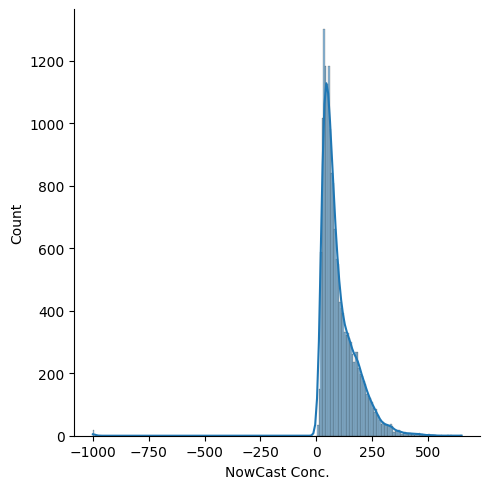

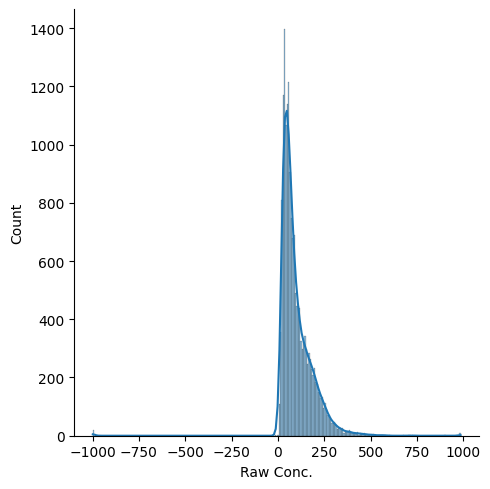

In [ ]:
# Distribution plot for a specific feature
sns.displot(X['NowCast Conc.'], kde=True)
plt.show()
sns.displot(X['Raw Conc.'], kde=True)
plt.show()

## Applying Standard Scaler

In [ ]:
# Select features to scale
features_to_scale = ['NowCast Conc.', 'Raw Conc.']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected features
combined_df_scaled = combined_df.copy()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

# Print the entire DataFrame including the scaled features
print("DataFrame with Scaled Features:")
X


DataFrame with Scaled Features:


,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
0,2022,1,1,1,0.374836,190,0.333093
1,2022,1,1,2,0.351014,188,0.299850
2,2022,1,1,3,0.315280,187,0.244445
3,2022,1,1,4,0.321235,187,0.299850
4,2022,1,1,5,0.304559,186,0.233364
...,...,...,...,...,...,...,...
17126,2023,12,31,20,1.108576,242,1.108766
17127,2023,12,31,21,1.144310,245,1.175252
17128,2023,12,31,22,1.118105,243,0.953631
17129,2023,12,31,23,1.084753,240,0.909307


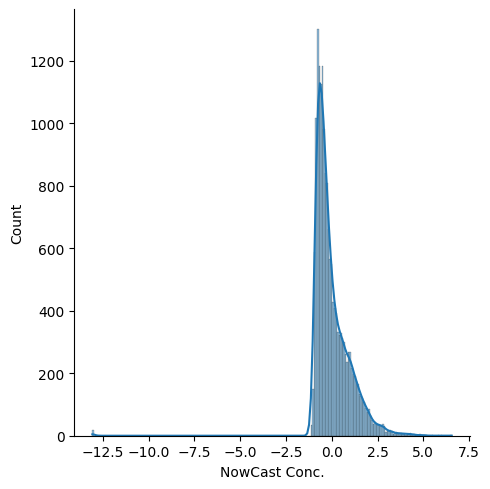

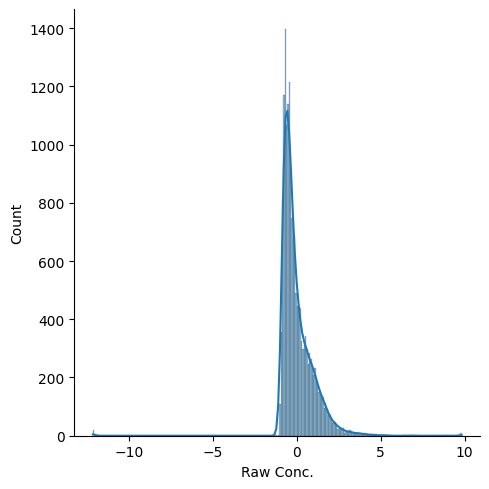

In [ ]:
# Distribution plot for a specific feature
sns.displot(X['NowCast Conc.'], kde=True)
plt.show()
sns.displot(X['Raw Conc.'], kde=True)
plt.show()

In [ ]:
# Verify the shape of the cleaned DataFrame
print("Original DataFrame shape:", X.shape)

Original DataFrame shape: (17131, 7)


## Using Boxplot for removing remaining outliers

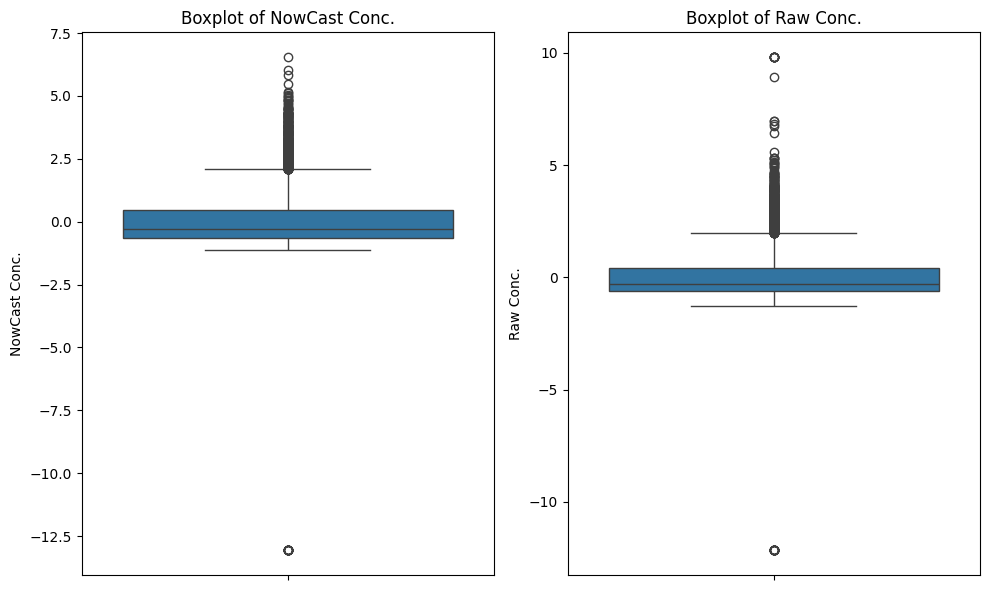

In [ ]:
# Create boxplots to identify outliers
plt.figure(figsize=(10, 6))

# Boxplot for NowCast Conc.
plt.subplot(1, 2, 1)
sns.boxplot(y=X['NowCast Conc.'])
plt.title('Boxplot of NowCast Conc.')

# Boxplot for Raw Conc.
plt.subplot(1, 2, 2)
sns.boxplot(y=X['Raw Conc.'])
plt.title('Boxplot of Raw Conc.')

plt.tight_layout()
plt.show()



In [ ]:
# Calculate the interquartile range (IQR) for NowCast Conc.
Q1_nowcast = X['NowCast Conc.'].quantile(0.25)
Q3_nowcast = X['NowCast Conc.'].quantile(0.75)
IQR_nowcast = Q3_nowcast - Q1_nowcast

# Calculate the bounds for outliers
lower_bound_nowcast = Q1_nowcast - 1.5 * IQR_nowcast
upper_bound_nowcast = Q3_nowcast + 1.5 * IQR_nowcast



# Filter outliers for NowCast Conc.
X = X[(X['NowCast Conc.'] >= lower_bound_nowcast) & (X['NowCast Conc.'] <= upper_bound_nowcast)]




In [ ]:
# Calculate the interquartile range (IQR) for Raw Conc.
Q1_raw = X['Raw Conc.'].quantile(0.25)
Q3_raw = X['Raw Conc.'].quantile(0.75)
IQR_raw = Q3_raw - Q1_raw

# Calculate the bounds for outliers
lower_bound_raw = Q1_raw - 1.5 * IQR_raw
upper_bound_raw = Q3_raw + 1.5 * IQR_raw

# Filter outliers for Raw Conc.
X = X[(X['Raw Conc.'] >= lower_bound_raw) & (X['Raw Conc.'] <= upper_bound_raw)]

In [ ]:


# Verify the shape of the cleaned DataFrame
print("Original DataFrame shape:", X.shape)

Original DataFrame shape: (16188, 7)


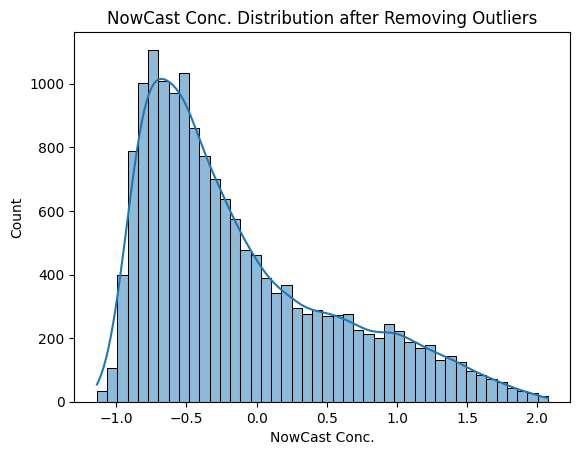

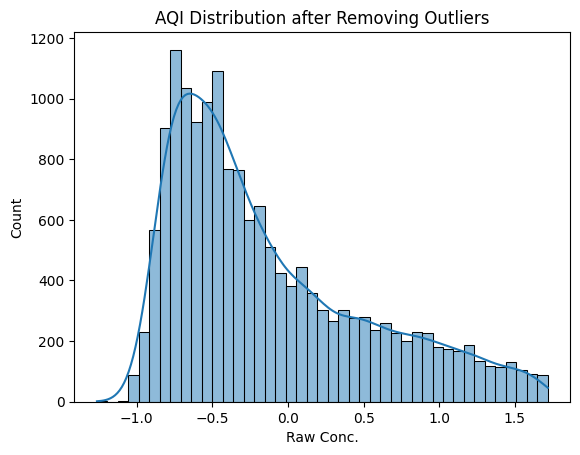

In [ ]:
# Plotting the NowCast Conc. after removing outliers
sns.histplot(X['NowCast Conc.'], kde=True)
plt.title('NowCast Conc. Distribution after Removing Outliers')
plt.show()

# Plotting the AQI after removing outliers
sns.histplot(X['Raw Conc.'], kde=True)
plt.title('AQI Distribution after Removing Outliers')
plt.show()


## Applying MinMax scaler

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choose the scaler
scaler1 = MinMaxScaler()

# Fit and transform the data
X[['NowCast Conc.', 'Raw Conc.']] = scaler1.fit_transform(X[['NowCast Conc.', 'Raw Conc.']])

# Verify the scaling
print(X[['NowCast Conc.', 'Raw Conc.']].describe())


       NowCast Conc.     Raw Conc.
count   16188.000000  16188.000000
mean        0.316451      0.381361
std         0.213430      0.217954
min         0.000000      0.000000
25%         0.150167      0.211896
50%         0.250649      0.312268
75%         0.440119      0.509294
max         1.000000      1.000000


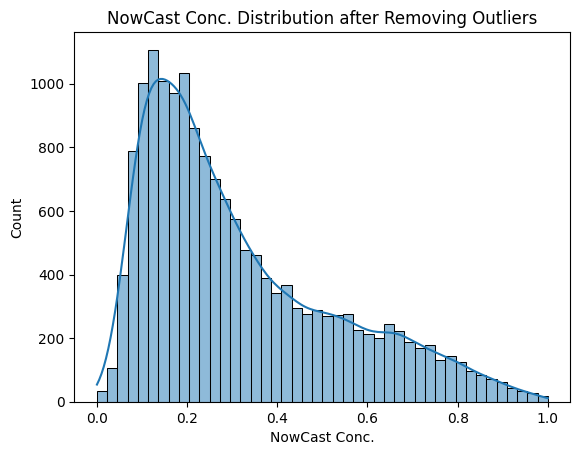

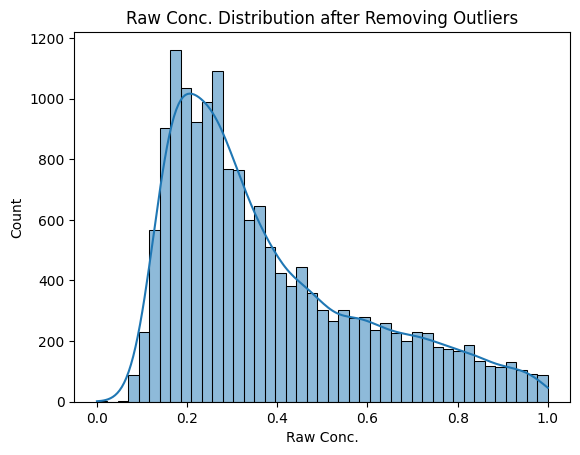

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the NowCast Conc. after removing outliers
sns.histplot(X['NowCast Conc.'], kde=True)
plt.title('NowCast Conc. Distribution after Removing Outliers')
plt.show()

# Plotting the AQI after removing outliers
sns.histplot(X['Raw Conc.'], kde=True)
plt.title('Raw Conc. Distribution after Removing Outliers')
plt.show()

In [ ]:
# Number of samples to remove
num_samples_to_remove = 943
# Ensure we don't remove more samples than available
if num_samples_to_remove > len(y):
    raise ValueError("Cannot remove more samples than available in the array.")

# Randomly select indices to remove
indices_to_remove = np.random.choice(len(y), size=num_samples_to_remove, replace=False)

# Remove elements using boolean indexing
y= y[~np.isin(np.arange(len(y)), indices_to_remove)]

print("Original array shape:", y.shape)
print("Filtered array shape:", y.shape)

Original array shape: (16188,)
Filtered array shape: (16188,)


In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (16188, 7)
Shape of y: (16188,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify=y)

In [ ]:
X_train.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
10988,2023,4,18,9,0.355209,173,0.412639
13298,2023,7,24,22,0.114943,97,0.174721
13039,2023,7,14,3,0.116426,98,0.185874
2417,2022,4,11,23,0.215795,154,0.219331
12068,2023,6,3,16,0.256581,160,0.338290


In [ ]:
y_train.head()

10775    3
13224    2
12945    2
2412     3
11917    5
Name: AQI Category, dtype: int64

## Applying Pearson's Correlation Coefficient Method

In [ ]:
#Let's find the feature correlations in the training set NOT in the total/test set

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
Year,1.000000,0.031255,0.007642,0.006352,0.019930,0.011313,0.014820
Month,0.031255,1.000000,0.013624,-0.010831,-0.215165,-0.227482,-0.203688
Day,0.007642,0.013624,1.000000,0.000972,0.010541,0.017470,0.008541
Hour,0.006352,-0.010831,0.000972,1.000000,-0.088345,-0.071493,-0.039116
NowCast Conc.,0.019930,-0.215165,0.010541,-0.088345,1.000000,0.962100,0.970212
AQI,0.011313,-0.227482,0.017470,-0.071493,0.962100,1.000000,0.933374
Raw Conc.,0.014820,-0.203688,0.008541,-0.039116,0.970212,0.933374,1.000000


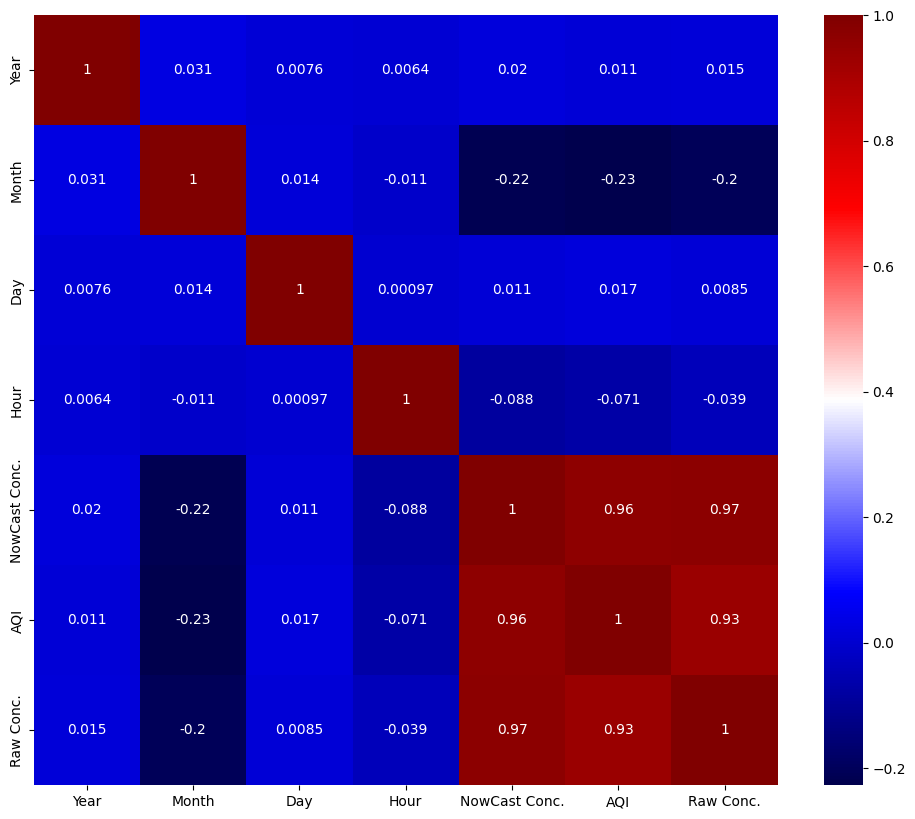

In [ ]:
# A good way to visualize correlation is using a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic");
# A link to choose different cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

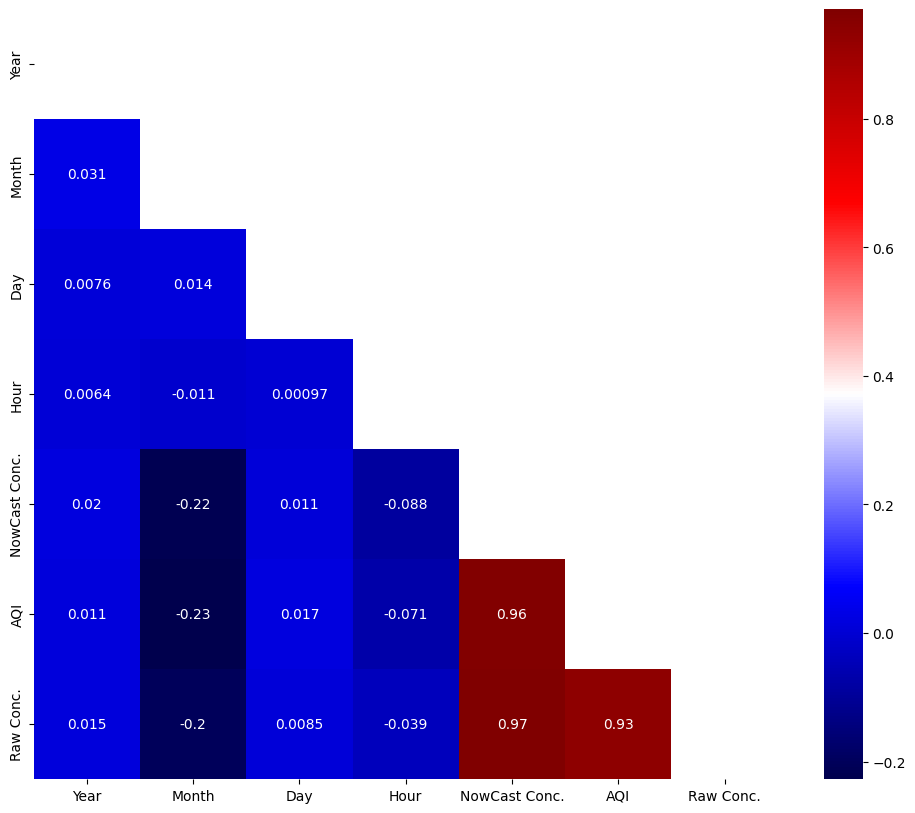

In [ ]:
# upper and lower triangles are duplicated
# use of the mask
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1); 
# sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask2); # mask1 removes the lower triangle

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr() # correlation matrix of all the features
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold. It is a hyperparameter
print(len(corr_features))
print(corr_features)

2
{'AQI', 'Raw Conc.'}


In [ ]:
# Drop the 'AQI' column from X_train and X_test in place
X_train.drop('AQI', axis=1, inplace=True)
X_test.drop('AQI', axis=1, inplace=True)


In [ ]:
X_train.drop('Raw Conc.', axis=1, inplace=True)
X_test.drop('Raw Conc.', axis=1, inplace=True)

In [ ]:
X_test.columns

Index(['Year', 'Month', 'Day', 'Hour', 'NowCast Conc.'], dtype='object')

In [ ]:
X_train.head()

,Year,Month,Day,Hour,NowCast Conc.
10988,2023,4,18,9,0.355209
13298,2023,7,24,22,0.114943
13039,2023,7,14,3,0.116426
2417,2022,4,11,23,0.215795
12068,2023,6,3,16,0.256581


In [ ]:
X_test.head()

,Year,Month,Day,Hour,NowCast Conc.
11440,2023,5,8,6,0.210604
16013,2023,11,15,10,0.246570
1635,2022,3,10,9,0.598813
8321,2022,12,28,6,0.567668
11663,2023,5,17,19,0.149055


In [ ]:
y_train.value_counts()

AQI Category
3    5642
4    2530
5    2111
2    1967
1     637
0      48
6      15
Name: count, dtype: int64

In [ ]:
X_train.shape

(12950, 5)

In [ ]:
y_train.shape

(12950,)

In [ ]:


# Define a custom sampling strategy
# The values represent the desired number of samples for each class
sampling_strategy = {
    0: 2000,  # Adjust this number as desired
    1: 3000,
    2: 4000,
    3: 5642,
    4: 5000,
    5: 4000,
    6: 2500  # Keep class 6 as it is or any other desired number
}

# Initialize the SMOTE object with the custom sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Apply SMOTE on the training dataset only
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verify the class distribution after resampling
print(y_train_res.value_counts())


AQI Category
3    5642
4    5000
2    4000
5    4000
1    3000
6    2500
0    2000
Name: count, dtype: int64


AQI Category
3    5642
4    5000
2    4000
5    4000
1    3000
6    2500
0    2000
Name: count, dtype: int64


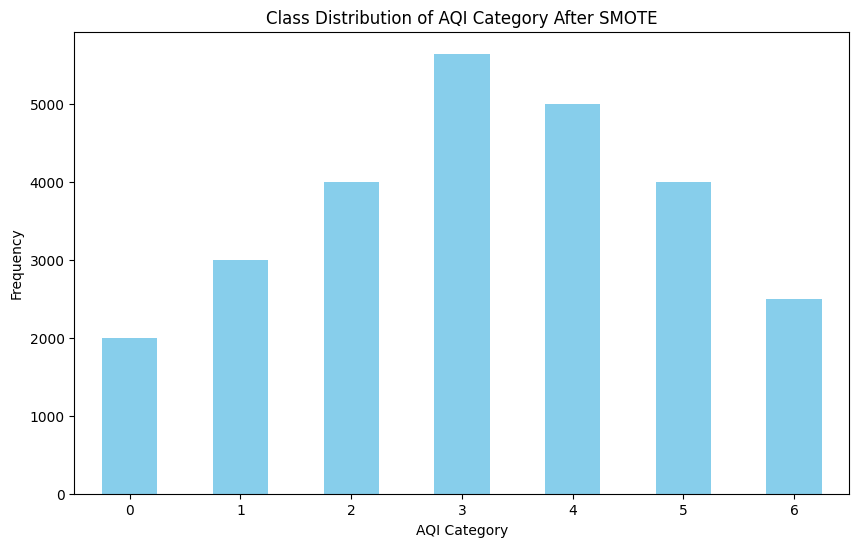

In [ ]:
# Verify the class distribution after resampling
print(y_train_res.value_counts())

# Generate bar chart for the class distribution after SMOTE
plt.figure(figsize=(10, 6))
y_train_res.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Class Distribution of AQI Category After SMOTE')
plt.xlabel('AQI Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# create a decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 100)
dt.fit(X_train_res, y_train_res) 

DecisionTreeClassifier(max_depth=100)

In [ ]:
# Predict on the test set
y_pred = dt.predict(X_test)




In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.72


Train

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base estimator with custom parameters
base_estimator = DecisionTreeClassifier(max_depth=100)  

# Create the AdaBoost classifier with specified parameters
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=0.5)  

# Train the AdaBoost model on weather classification data
adaboost_model.fit(X_train, y_train) 




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=100),
                   learning_rate=0.5, n_estimators=100)

In [ ]:
# Predictions and evaluation
y_pred = adaboost_model.predict(X_test)
print("Classification Report (Default Settings):")
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



Classification Report (Default Settings):
Model accuracy: 0.73
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.57      0.62      0.60       159
           2       0.75      0.77      0.76       492
           3       0.80      0.79      0.79      1411
           4       0.62      0.61      0.61       632
           5       0.70      0.70      0.70       528
           6       0.00      0.00      0.00         4

    accuracy                           0.73      3238
   macro avg       0.61      0.59      0.60      3238
weighted avg       0.73      0.73      0.73      3238



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
import numpy as np


param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'base_estimator__max_depth': [3, 5, 7, 9],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 2, 4]

}

# Initialize AdaBoost model
base_estimator = DecisionTreeClassifier()  
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator)


random_search = RandomizedSearchCV(estimator=adaboost_model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=20)


random_search.fit(X_train_res, y_train_res)

print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

# Evaluation
y_pred = random_search.best_estimator_.predict(X_test)
print(f"Test set accuracy: {accuracy_score(y_test, y_pred)}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters found: {'n_estimators': 300, 'learning_rate': 0.1, 'base_estimator__min_samples_split': 5, 'base_estimator__min_samples_leaf': 2, 'base_estimator__max_depth': 9}
Best cross-validation score: 0.8013923953790835
Test set accuracy: 0.705064854848672


In [ ]:
import lime
from lime import lime_tabular
from sklearn.ensemble import AdaBoostClassifier

# Fit the AdaBoost model
adaboost_model.fit(X_train_res, y_train_res)


explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_res),
    feature_names=X_train_res.columns,
    class_names=['0', '1', '2', '3', '4', '5', '6'],  
    mode='classification'
)


data_row = X_test.iloc[0]


exp = explainer.explain_instance(
    data_row=data_row,
    predict_fn=adaboost_model.predict_proba  
)


exp.show_in_notebook(show_table=True)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
